<a href="https://colab.research.google.com/github/SannapaneniBharadwaj/Homesite_Quote_Conversion_Project/blob/master/Homesite_Quote_Conversion_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Colab library to upload files to notebook
from google.colab import files

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

In [ ]:
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

In [ ]:
# Upload kaggle API key file
!mkdir ~/.kaggle
cd ~/.kaggle/
uploaded = files.upload()
!kaggle competitions download -c homesite-quote-conversion

Saving kaggle.json to kaggle.json
 92% 34.0M/37.1M [00:00<00:00, 44.5MB/s]
100% 37.1M/37.1M [00:00<00:00, 68.9MB/s]
  0% 0.00/258k [00:00<?, ?B/s]
100% 258k/258k [00:00<00:00, 4.15MB/s]
 77% 19.0M/24.7M [00:01<00:01, 4.61MB/s]
100% 24.7M/24.7M [00:01<00:00, 13.5MB/s]


In [ ]:
ls

kaggle.json  sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [ ]:
train_df = pd.read_csv('train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
test_df = pd.read_csv('test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [ ]:
print(train_df.shape)
train_df.head()

(260753, 299)


,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,...,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,17,23,17,23,15,22,16,22,13,22,13,23,T,D,2,1,7,18,3,8,0,5,5,24,V,48649,0,0,0,0,...,8,4,20,22,10,8,6,5,15,13,19,18,16,14,21,23,21,23,16,11,22,24,7,14,-1,17,15,17,14,18,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,6,8,6,8,5,7,5,8,13,22,13,23,T,E,5,9,5,14,6,18,1,5,5,11,P,26778,0,0,1,1,...,23,24,11,15,21,24,6,11,21,21,18,15,20,20,13,12,12,12,15,9,13,11,11,20,-1,9,18,21,8,7,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,7,12,7,12,6,10,7,11,25,25,13,23,T,J,4,6,3,10,4,11,1,5,5,11,K,8751,0,0,2,2,...,21,22,24,25,20,22,7,13,23,23,20,19,20,20,18,20,19,21,20,19,11,8,3,3,-1,5,21,24,12,15,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,3,2,3,2,2,2,3,2,13,22,13,23,Y,F,15,23,8,19,14,24,0,5,5,23,V,43854,0,0,0,0,...,3,1,14,22,6,2,7,14,11,8,19,18,18,16,13,12,13,12,17,13,5,2,3,4,-1,7,14,14,14,18,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,8,13,8,13,7,11,7,13,13,22,13,23,T,F,4,6,3,6,3,6,1,5,5,7,R,12505,1,0,0,0,...,24,25,9,11,25,25,5,3,22,22,21,21,17,15,25,25,25,25,17,13,13,11,3,4,-1,7,11,9,10,10,18,22,-1,10,-1,11,-1,12,N,IL


Quote Number is an uninformative field in predicting QuoteConversion_Flag so removing dropping the variable

In [ ]:
train_df.drop('QuoteNumber',axis = 1,inplace = True)
test_df.drop('QuoteNumber',axis = 1,inplace = True)

In [ ]:
print(train_df['Original_Quote_Date'].dtype)

object


We can see that the date is represented as a string, we can convert it into three different variables of year, month and day for better processing

In [ ]:
train_df['Quote_Year'] = pd.to_datetime(train_df.Original_Quote_Date).dt.year
train_df['Quote_Month'] = pd.to_datetime(train_df.Original_Quote_Date).dt.month
train_df['Quote_Day'] = pd.to_datetime(train_df.Original_Quote_Date).dt.day

test_df['Quote_Year'] = pd.to_datetime(test_df.Original_Quote_Date).dt.year
test_df['Quote_Month'] = pd.to_datetime(test_df.Original_Quote_Date).dt.month
test_df['Quote_Day'] = pd.to_datetime(test_df.Original_Quote_Date).dt.day

Now the drop the previous date columns

In [ ]:
train_df.drop('Original_Quote_Date',axis = 1,inplace = True)
test_df.drop('Original_Quote_Date',axis = 1,inplace = True)

There are 260,753 training instances, 297 features and one target variable in the  data. Our goal is to predict QuoteConversion_Flag using these 297 features

Value Counts of Quote Conversion Flag

 0    211859
1     48894
Name: QuoteConversion_Flag, dtype: int64


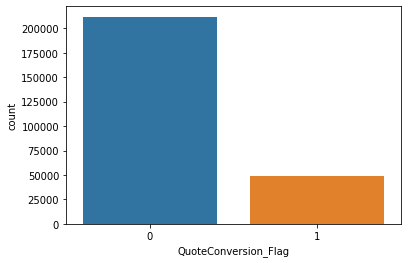

In [ ]:
print("Value Counts of Quote Conversion Flag\n\n",train_df['QuoteConversion_Flag'].value_counts())
ax = sns.countplot(train_df['QuoteConversion_Flag'])
plt.show()

There are about 210,000 quotes that are not converted to purchases and 50000 quotes that are purchased. Classes are highly imbalanced and this is expected since lot of customers takes quote while few of them are converted to purchases

Lets see what are the features we have in the data set

In [135]:
#list(train_df.columns)

Counts of different data types in the data
 int64      267
object      27
float64      6
dtype: int64


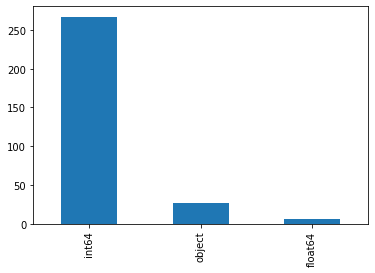

In [ ]:
print("Counts of different data types in the data\n",train_df.dtypes.value_counts())
pd.value_counts(train_df.dtypes).plot(kind="bar")
plt.show()

In [ ]:
train_df.describe()

,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,...,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,Quote_Year,Quote_Month,Quote_Day
count,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,...,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000
mean,0.187511,18.293339,0.938346,0.001451,1.162718,9.012533,13.000403,9.054005,13.015240,9.053150,13.007563,8.967540,13.013496,13.818568,21.206379,11.488685,19.202421,7.809249,12.982175,6.223767,13.000107,5.734247,12.982704,0.744958,4.343486,4.224600,14.001154,33734.858314,0.147005,0.340698,0.597911,0.623966,0.063623,0.095527,0.098189,0.726515,0.699156,9.729763,11.940726,6.630781,...,12.997787,10.041710,13.001511,13.188968,13.003532,9.706017,13.119113,14.375309,12.941512,15.999091,12.937746,14.933719,12.943433,13.130399,12.937167,13.022370,12.937815,16.089207,12.937911,13.500174,12.922313,8.087980,12.908837,-0.341906,12.965699,13.205045,13.002857,11.567756,12.985695,11.694903,13.049882,-0.350481,12.994362,-0.343601,13.042734,-0.341009,14.122948,2013.776532,5.675532,15.414465
std,0.390322,7.382803,0.037086,0.001486,0.116833,5.576509,7.219264,5.560521,7.211717,5.579687,7.211417,5.549876,7.202253,5.102779,4.901781,6.892669,7.381384,5.294721,7.249269,5.201169,7.206967,4.996300,7.224063,0.435886,1.024308,0.977157,6.297276,19444.146851,0.354112,0.773829,1.107087,1.136513,0.288390,0.367653,0.374738,0.445748,0.458626,6.821498,8.003960,0.568167,...,7.207199,6.114244,7.211625,5.381441,7.207169,6.109350,7.257001,6.322120,7.262354,5.513966,7.260546,5.957889,7.262158,6.007871,7.260404,6.095688,7.262391,5.840487,7.259907,5.766017,7.270204,5.707726,7.273700,4.083800,7.210315,5.310079,7.212153,5.448425,7.216091,5.626092,7.213636,4.057792,7.219943,4.078673,7.145248,4.086511,5.829091,0.726497,3.305120,8.760221
min,0.000000,1.000000,0.874600,0.000400,1.000000,-1.0000

### Correlation plot with these many number of variables can be messy but we can try to see how it looks and try to understand if there is a strong correlation between variables

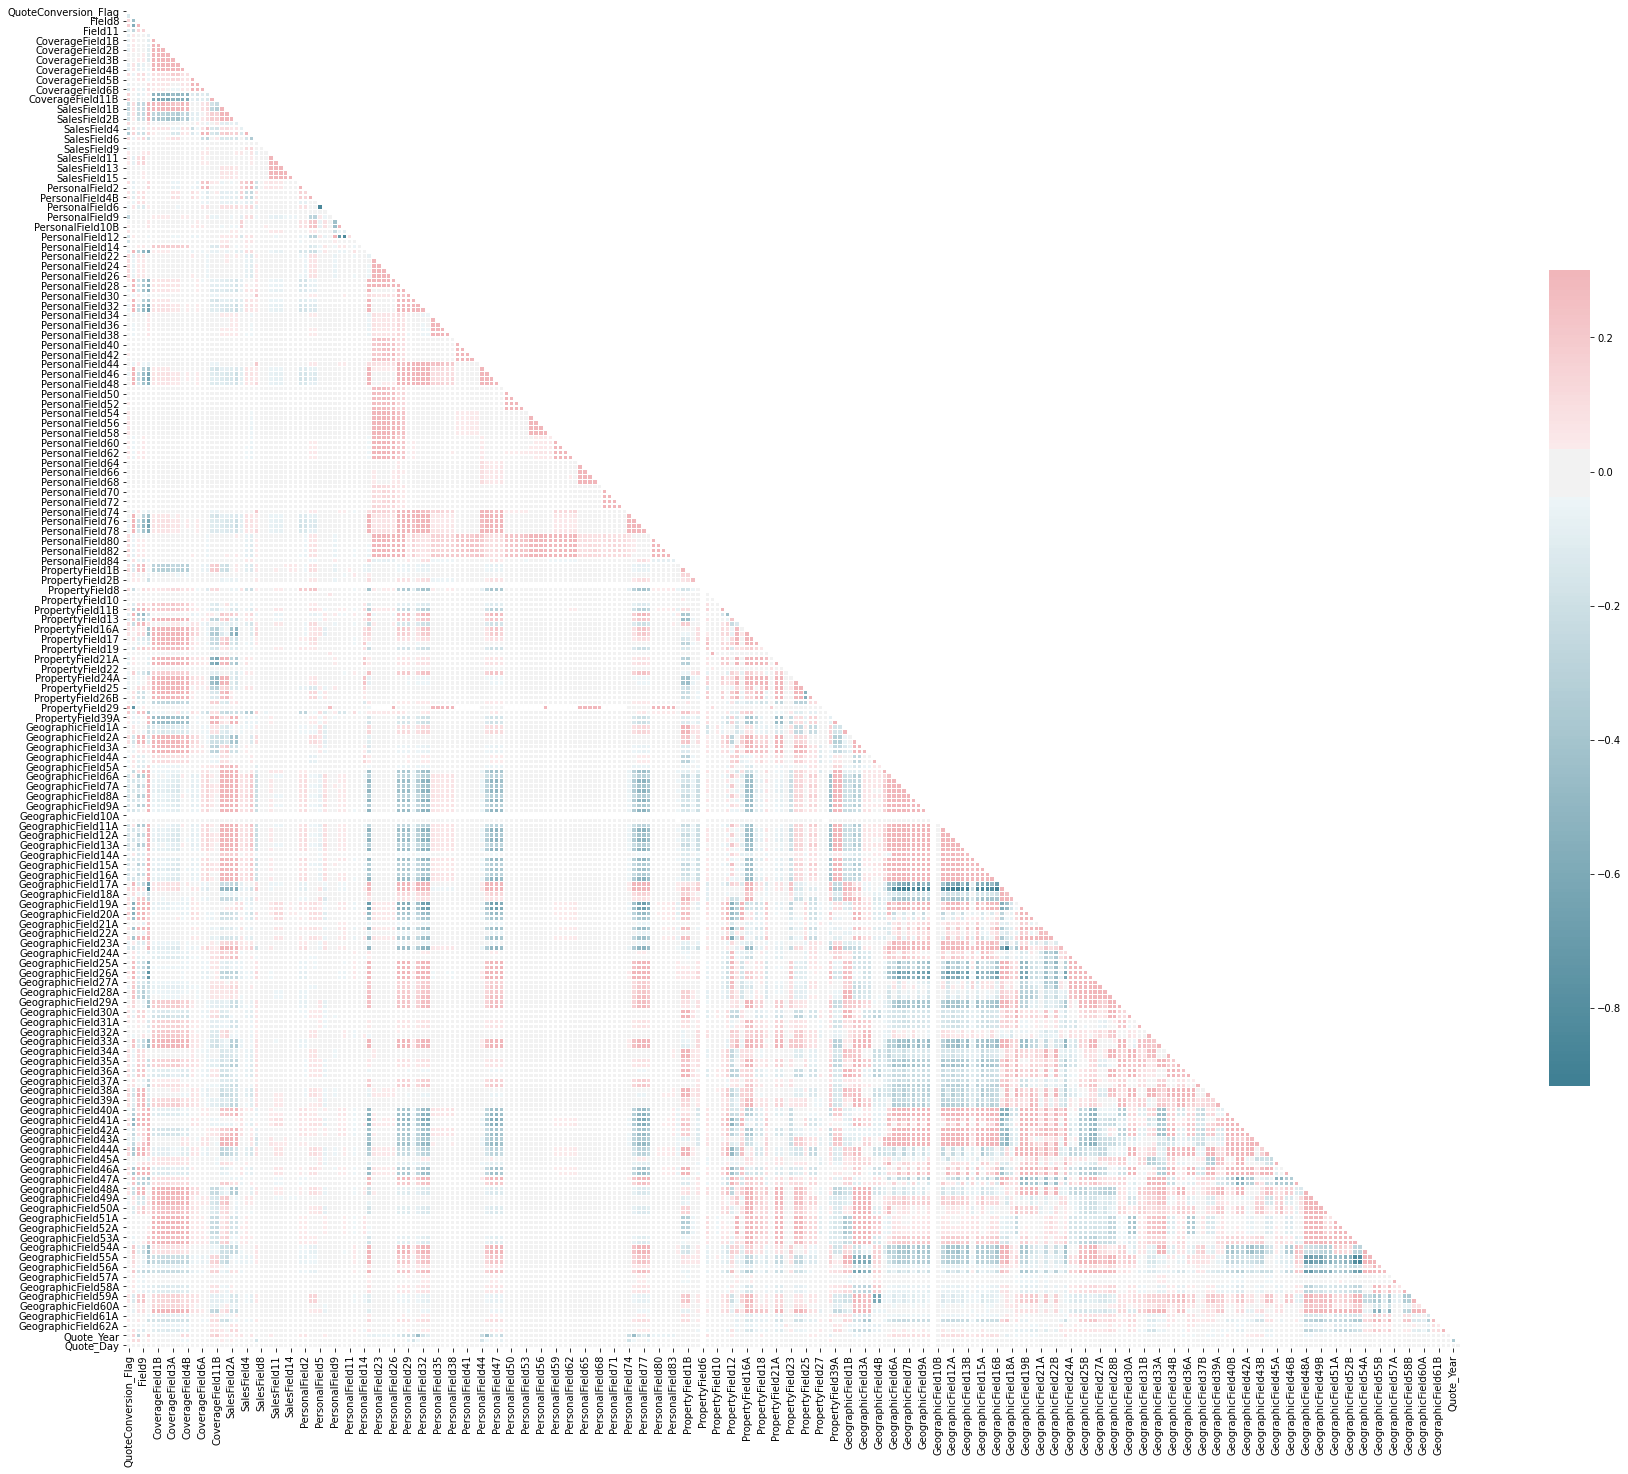

In [ ]:
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Checking if there any Nulls in the dataset

In [ ]:
train_df.isna().any().any()

False

Label Encoding categorical features to make them suitable for the ML model

In [ ]:
for feature in train_df.columns:
    if train_df[feature].dtype=='object':
        print(feature)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[feature].values) + list(test_df[feature].values))
        train_df[feature] = lbl.transform(list(train_df[feature].values))
        test_df[feature] = lbl.transform(list(test_df[feature].values))

Field6
Field10
Field12
CoverageField8
CoverageField9
SalesField7
PersonalField7
PersonalField16
PersonalField17
PersonalField18
PersonalField19
PropertyField3
PropertyField4
PropertyField5
PropertyField7
PropertyField14
PropertyField28
PropertyField30
PropertyField31
PropertyField32
PropertyField33
PropertyField34
PropertyField36
PropertyField37
PropertyField38
GeographicField63
GeographicField64


Building a classifier for classification

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train_df.drop('QuoteConversion_Flag',axis=1),train_df['QuoteConversion_Flag'], test_size=0.25, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

# Fit the model over training set
J = rf.fit(X_train,y_train)


In [ ]:
# Make predictions over test set
y_test_pred = rf.predict(X_test)

# Measure accuracy over test set
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy over test set:', accuracy)

Accuracy over test set: 0.9158907177591311


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     52873
           1       0.88      0.65      0.74     12316

    accuracy                           0.92     65189
   macro avg       0.90      0.81      0.85     65189
weighted avg       0.91      0.92      0.91     65189



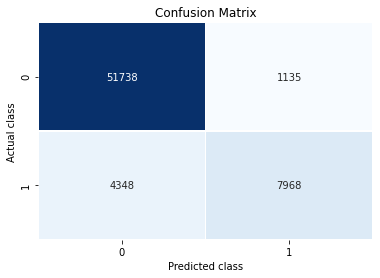

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,4))

cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix");

Seeing the above results we can say that we have a good classification model and also the features have relevant information which can predict the purchasing decision of a Quote

### Get Important features that are responsible for predicting the Quote purchase

In [95]:
feat_imp = pd.DataFrame([rf.feature_importances_],columns = X_train.columns)
feat_imp = feat_imp.sort_values(by = 0,axis = 1,ascending = False)

In [108]:
feat_imp.T

,0
PropertyField37,9.651847e-02
SalesField5,6.080051e-02
PersonalField10B,3.452351e-02
PersonalField10A,3.273451e-02
SalesField4,2.472676e-02
...,...
PersonalField8,7.599158e-07
PropertyField9,3.013217e-07
PropertyField6,0.000000e+00
GeographicField10A,0.000000e+00


#### Plotting the importances of top 10 features as bar plot

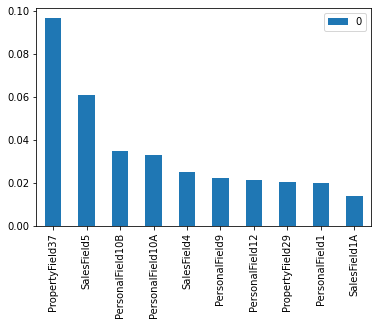

In [119]:
ax = feat_imp.T.head(10).plot.bar()

### Since the above variables are more important in predicting whether a customer will buy a quote or not, lets observe these variables carefully

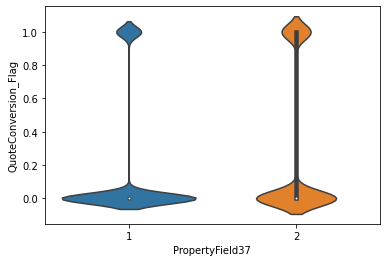

In [129]:
ax = sns.violinplot(x = 'PropertyField37',y = 'QuoteConversion_Flag',data = train_df)

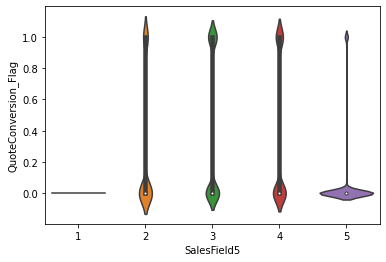

In [131]:
ax = sns.violinplot(x = 'SalesField5',y = 'QuoteConversion_Flag',data = train_df)

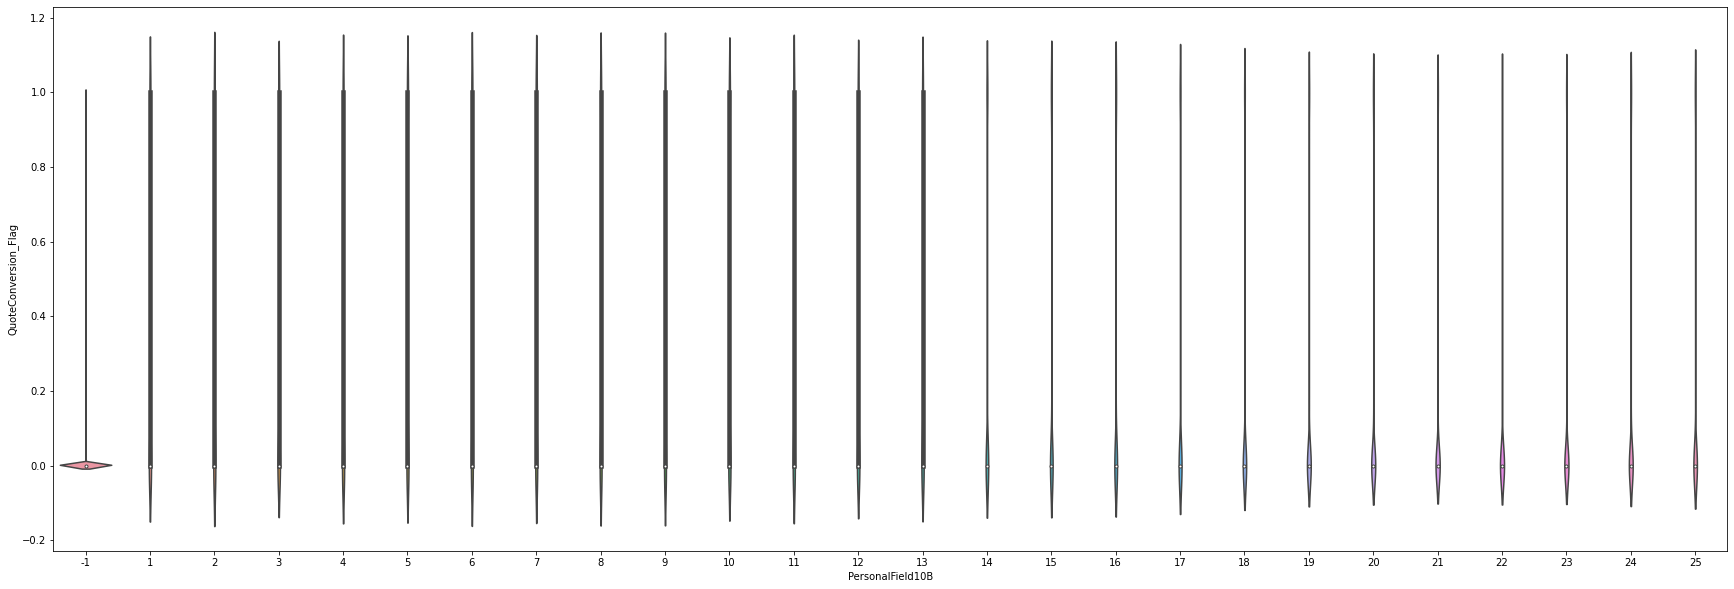

In [134]:
f, ax = plt.subplots(figsize=(30, 10))
ax = sns.violinplot(x = 'PersonalField10B',y = 'QuoteConversion_Flag',data = train_df)